## Importación de librerías y carga de datos



In [59]:
# Importar librerías necesarias
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
df_alturas = pd.read_csv('Alturas_7mo.csv')

# Mostrar los primeros registros del DataFrame
print(df_alturas.head(14))


          Nombre  Altura (cm) Sexo
0            Fer          180    M
1            Ale          170    M
2           Alex          170    M
3           Gael          168    M
4          Erick          165    M
5          Angie          168    F
6          Karla          170    F
7          Angel          175    M
8          Derik          174    M
9     Jose Jacal          175    M
10  Leo Dorantes          171    M
11          Lalo          172    M
12       Antonio          170    M
13  Luis Hurtado          177    M


## Prueba T-student

Primera hipótesis para comparar si hay una diferencia significativa en la estatura promedio entre hombres y mujeres.

**Hipótesis Nula (H₀):** No hay diferencia significativa entre la estatura promedio de hombres y mujeres.

**Hipótesis Alternativa (H₁):** Hay una diferencia significativa entre la estatura promedio de hombres y mujeres.

Utilizamos la prueba T para dos muestras independientes.


In [60]:
# Separar los datos por género
hombres = df_alturas[df_alturas['Sexo'] == 'M']['Altura (cm)']
mujeres = df_alturas[df_alturas['Sexo'] == 'F']['Altura (cm)']

# Realizar la prueba T-student
t_stat, p_value_ttest = stats.ttest_ind(hombres, mujeres)
print(f"T-test entre hombres y mujeres: t_stat={t_stat}, p_value={p_value_ttest}")

# Interpretación del resultado
if p_value_ttest < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre las estaturas de hombres y mujeres.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa entre las estaturas de hombres y mujeres.")


T-test entre hombres y mujeres: t_stat=1.068693712516953, p_value=0.3062347024139337
No se rechaza la hipótesis nula: no hay una diferencia significativa entre las estaturas de hombres y mujeres.


## Prueba de Normalidad (Shapiro-Wilk)

Ahora probamos si las estaturas siguen una distribución normal. Esta es una suposición importante para algunas pruebas estadísticas.

**Hipótesis Nula (H₀):** Las estaturas siguen una distribución normal.

**Hipótesis Alternativa (H₁):** Las estaturas no siguen una distribución normal.


In [61]:
# Prueba de normalidad: Shapiro-Wilk para las estaturas
w_stat, p_value_normality = stats.shapiro(df_alturas['Altura (cm)'])
print(f"Prueba de normalidad (Shapiro-Wilk): w_stat={w_stat}, p_value={p_value_normality}")

# Interpretación del resultado
if p_value_normality < 0.05:
    print("Se rechaza la hipótesis nula: las estaturas no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula: las estaturas siguen una distribución normal.")



Prueba de normalidad (Shapiro-Wilk): w_stat=0.9610110696232878, p_value=0.7397147899865807
No se rechaza la hipótesis nula: las estaturas siguen una distribución normal.


## Prueba de Chi-cuadrada

Finalmente, realizamos una prueba de Chi-cuadrada para determinar si hay una relación significativa entre el género y el nivel educativo (simulado).

**Hipótesis Nula (H₀):** No hay relación significativa entre el género y el nivel educativo.

**Hipótesis Alternativa (H₁):** Existe una relación significativa entre el género y el nivel educativo.


In [62]:
# Definir los niveles educativos
niveles_educativos = ['Primaria', 'Secundaria', 'Universidad']

# Asignar un nivel educativo aleatorio a cada fila
df_alturas['Nivel Educativo'] = np.random.choice(niveles_educativos, size=len(df_alturas))

# Tabulación cruzada para la prueba de Chi-cuadrada
tabla_contingencia = pd.crosstab(df_alturas['Sexo'], df_alturas['Nivel Educativo'])

# Realizar la prueba de Chi-cuadrada
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(tabla_contingencia)
print(f"Prueba Chi-Cuadrada: chi2_stat={chi2_stat}, p_value={p_value_chi2}")


Prueba Chi-Cuadrada: chi2_stat=0.7291666666666666, p_value=0.6944859597510076


## Paso 5: Visualización de los Resultados

Finalmente, visualizamos los promedios de estatura entre hombres y mujeres mediante un gráfico de barras.


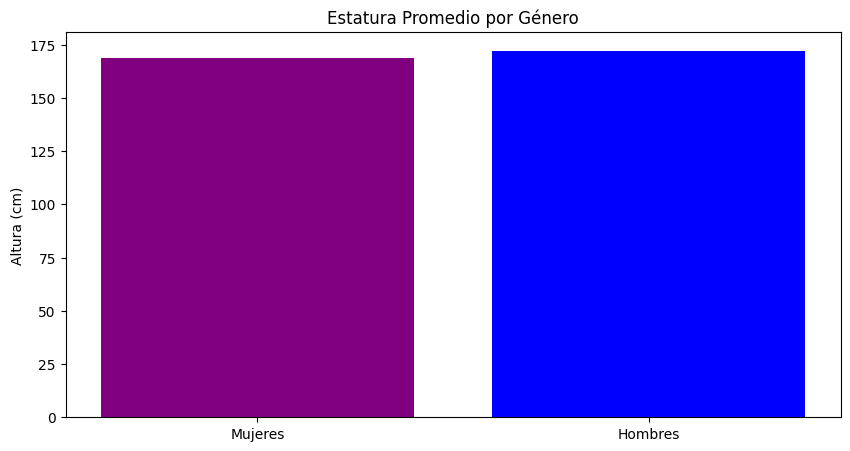

In [65]:
# Gráfico de barras de las estaturas promedio
promedio_mujeres_estaturas = mujeres.mean()
promedio_hombres_estaturas = hombres.mean()

plt.figure(figsize=(10, 5))
plt.bar(['Mujeres', 'Hombres'], [promedio_mujeres_estaturas, promedio_hombres_estaturas], color=['purple', 'blue'])
plt.title('Estatura Promedio por Género')
plt.ylabel('Altura (cm)')
plt.show()



### Interpretación final:
- Después de realizar las pruebas estadísticas y observar los valores p obtenidos, podemos tomar decisiones sobre las hipótesis planteadas.
- En la visualización, se puede observar la diferencia entre las estaturas promedio de hombres y mujeres, complementando el resultado del T-test.
